In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#1.Data Preparation

In [38]:
df = pd.read_csv("gym_members_exercise_tracking.csv")
df.head()

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            973 non-null    int64  
 1   Gender                         973 non-null    object 
 2   Max_BPM                        973 non-null    int64  
 3   Avg_BPM                        973 non-null    int64  
 4   Resting_BPM                    973 non-null    int64  
 5   Session_Duration (hours)       973 non-null    float64
 6   Calories_Burned                973 non-null    float64
 7   Workout_Type                   973 non-null    object 
 8   Fat_Percentage                 973 non-null    float64
 9   Water_Intake (liters)          973 non-null    float64
 10  Workout_Frequency (days/week)  973 non-null    int64  
 11  Experience_Level               973 non-null    object 
 12  BMI                            973 non-null    flo

In [6]:
df.describe()

,Age,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
count,973.000000,973.000000,973.00000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000
mean,38.683453,73.854676,1.72258,179.883864,143.766701,62.223022,1.256423,905.422405,24.976773,2.626619,3.321686,1.809866,24.912127
std,12.180928,21.207500,0.12772,11.525686,14.345101,7.327060,0.343033,272.641516,6.259419,0.600172,0.913047,0.739693,6.660879
min,18.000000,40.000000,1.50000,160.000000,120.000000,50.000000,0.500000,303.000000,10.000000,1.500000,2.000000,1.000000,12.320000
25%,28.000000,58.100000,1.62000,170.000000,131.000000,56.000000,1.040000,720.000000,21.300000,2.200000,3.000000,1.000000,20.110000
50%,40.000000,70.000000,1.71000,180.000000,143.000000,62.000000,1.260000,893.000000,26.200000,2.600000,3.000000,2.000000,24.160000
75%,49.000000,86.000000,1.80000,190.000000,156.000000,68.000000,1.460000,1076.000000,29.300000,3.100000,4.000000,2.000000,28.560000
max,59.000000,129.900000,2.00000,199.000000,169.000000,74.000000,2.000000,1783.000000,35.000000,3.700000,5.000000,3.000000,49.840000


In [39]:
df.describe(include=['object'])

,Gender,Workout_Type
count,973,973
unique,2,4
top,Male,Strength
freq,511,258


In [42]:
# Deleting Weight & Height cause produce BMI
df = df.drop(columns=['Weight (kg)','Height (m)'])

# Renaming Column
df['Experience_Level'] = df['Experience_Level'].map({
    1: 'Beginner',
    2: 'Intermediate',
    3: 'Expert'
})

df.head()

,Age,Gender,Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,Expert,30.20
1,46,Female,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,Intermediate,32.00
2,32,Female,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,Intermediate,24.71
3,25,Male,190,164,56,0.59,532.0,Strength,28.8,2.1,3,Beginner,18.41
4,38,Male,188,158,68,0.64,556.0,Strength,29.2,2.8,3,Beginner,14.39


# 2. EDA(Exploratory Data Analysis)

In [44]:
numeric_df = df.select_dtypes(include="number")
categorical_df = df.select_dtypes(exclude="number")

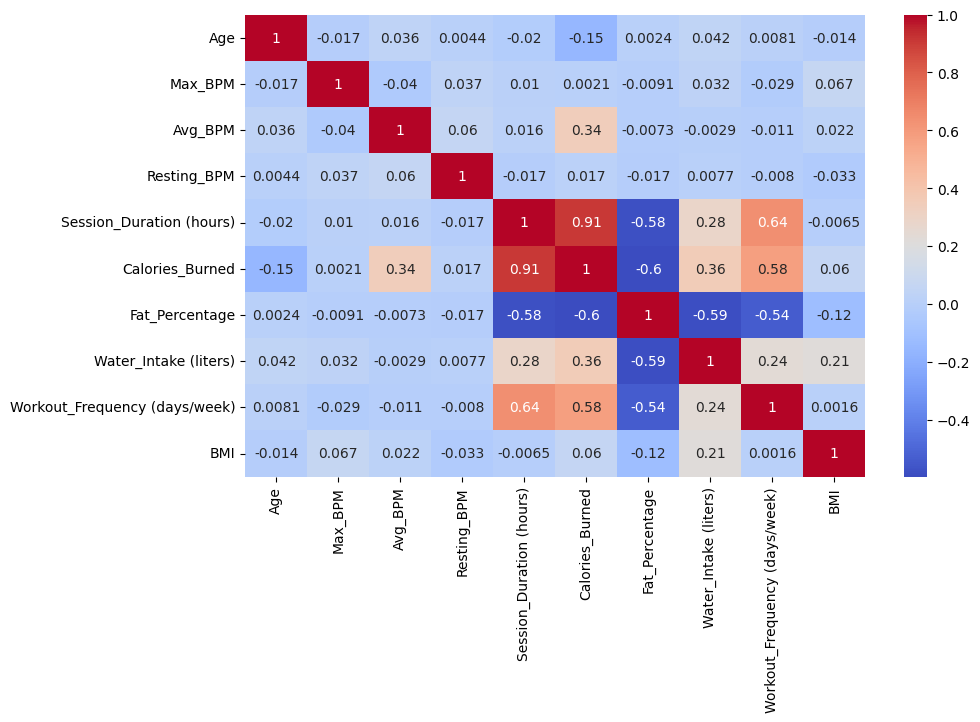

In [98]:
numeric_df = df.select_dtypes(include=['int64','float64'])
plt.figure(figsize = (10,6))
corr = numeric_df.corr()
sns.heatmap(corr,annot = True,cmap = "coolwarm")
plt.show()

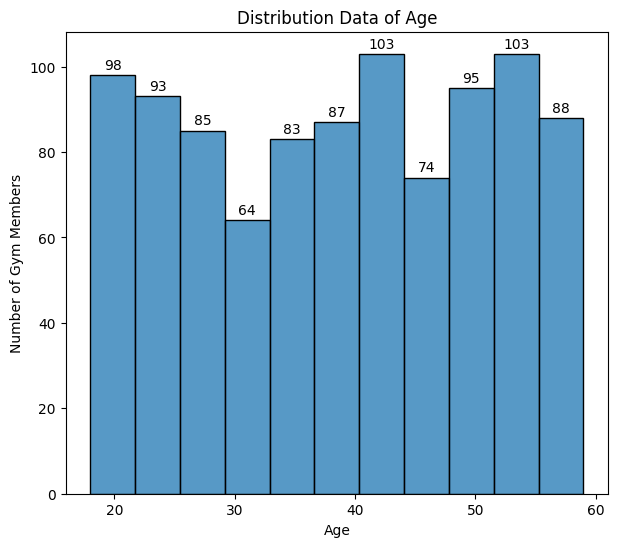

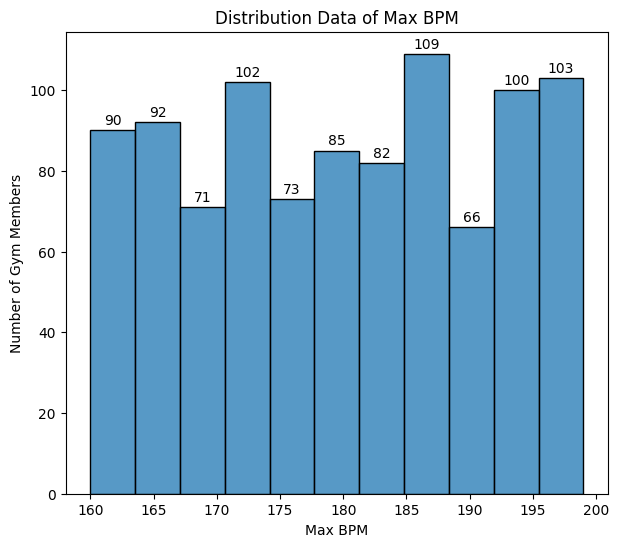

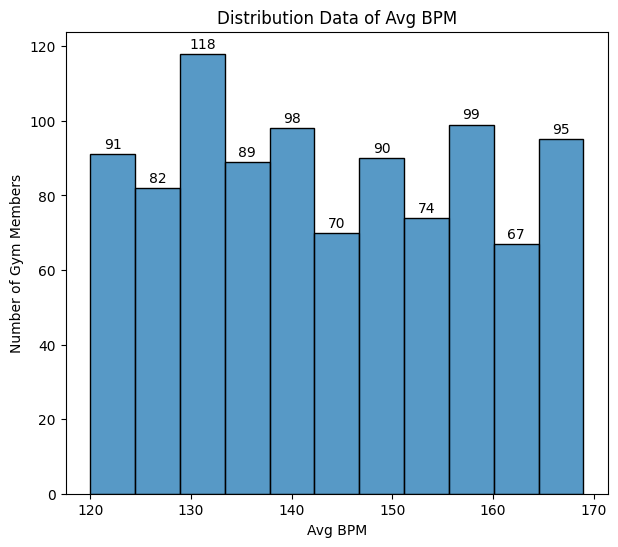

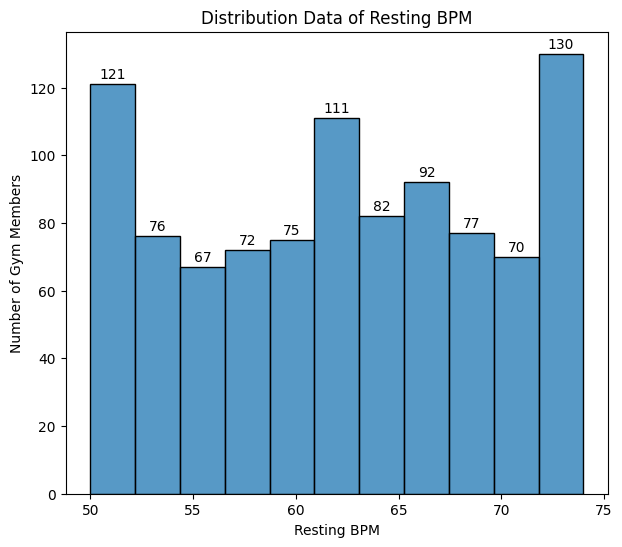

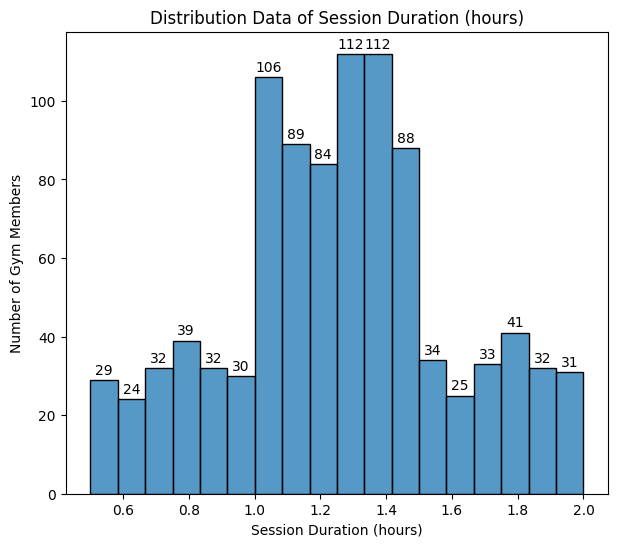

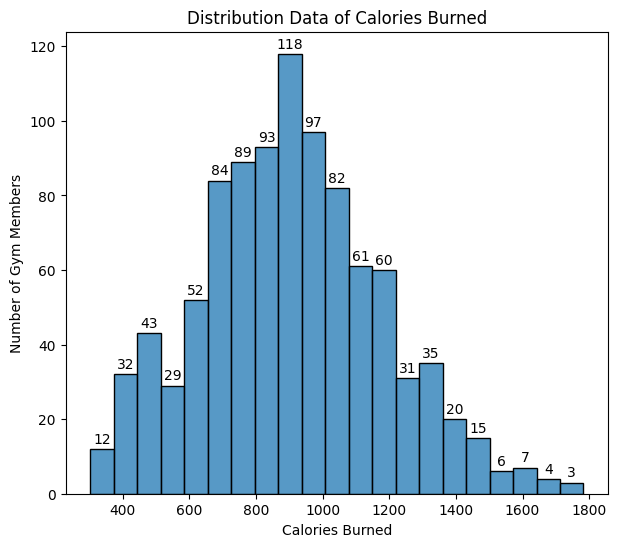

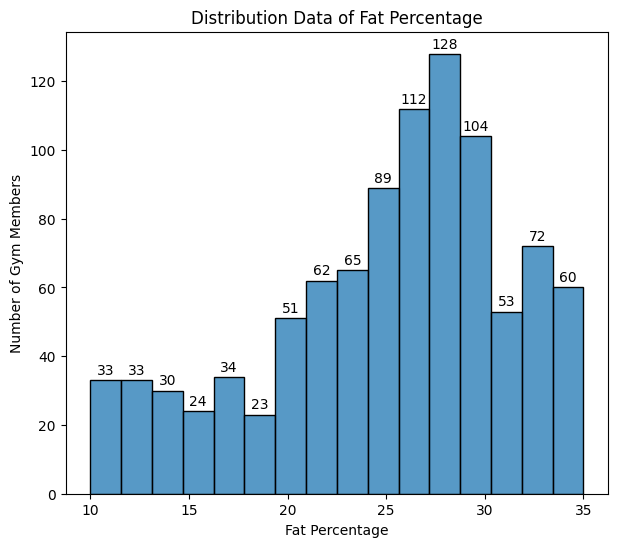

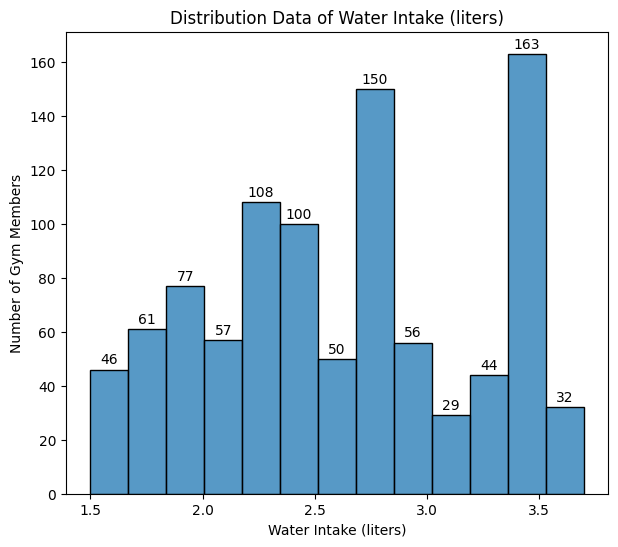

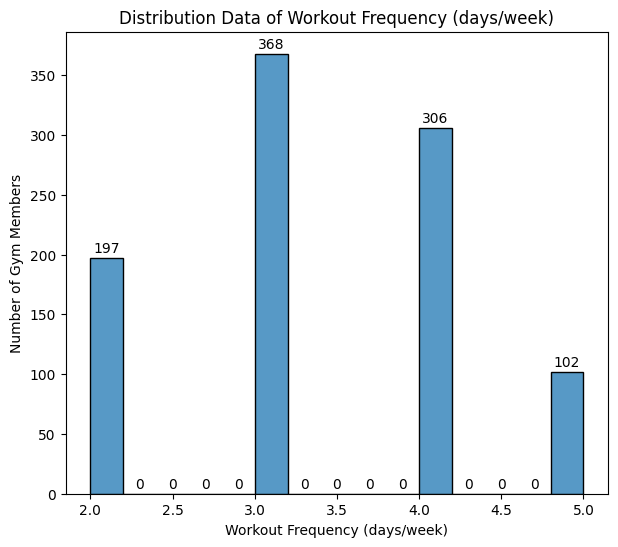

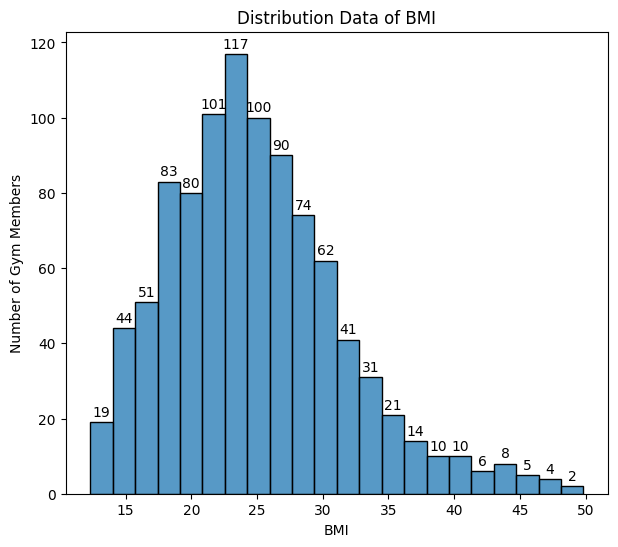

In [45]:
# Data Distribution in Dataset
for column in numeric_df:
  plt.figure(figsize=(7, 6))
  ax = sns.histplot(data=df, x=column)

  for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=10, padding=2)

  plt.xlabel(column.replace("_", " "))
  plt.ylabel("Number of Gym Members")
  plt.title(f"Distribution Data of {column.replace('_', ' ')}")
  plt.show()

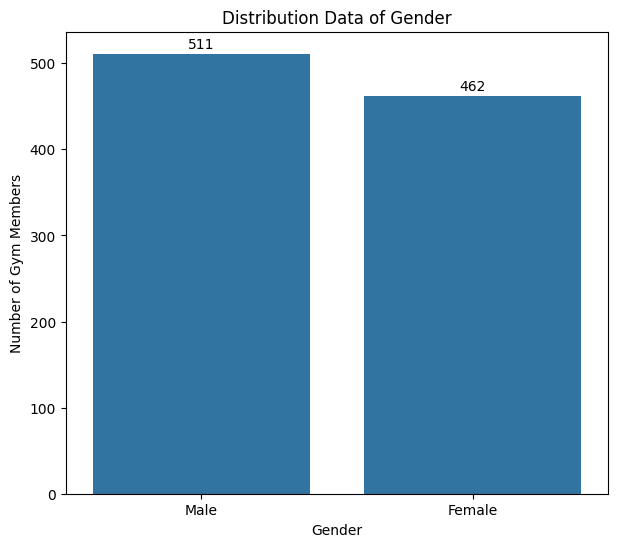

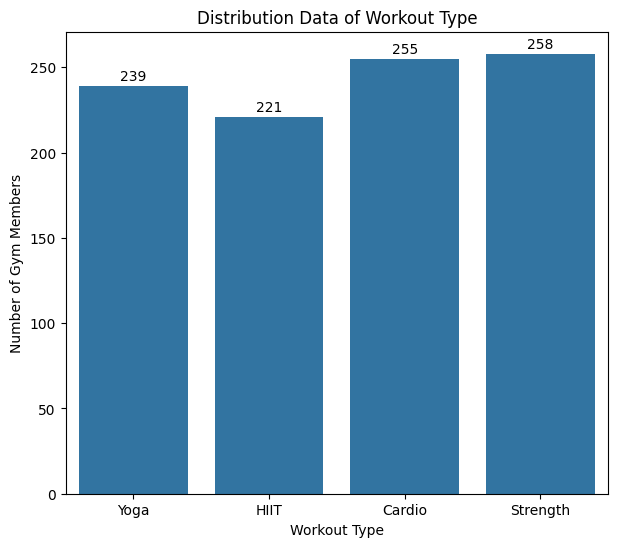

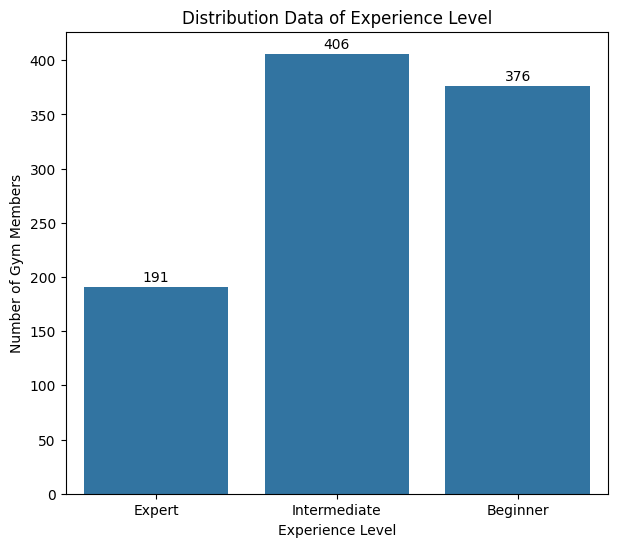

In [48]:
# Data Distribution in Dataset
for column in categorical_df:
  plt.figure(figsize=(7, 6))
  ax = sns.countplot(data=df,x=column)

  for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=10, padding=2)

  plt.xlabel(column.replace("_", " "))
  plt.ylabel("Number of Gym Members")
  plt.title(f"Distribution Data of {column.replace('_', ' ')}")
  plt.show()

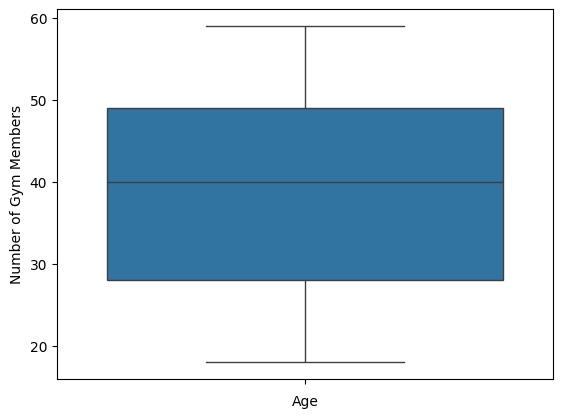

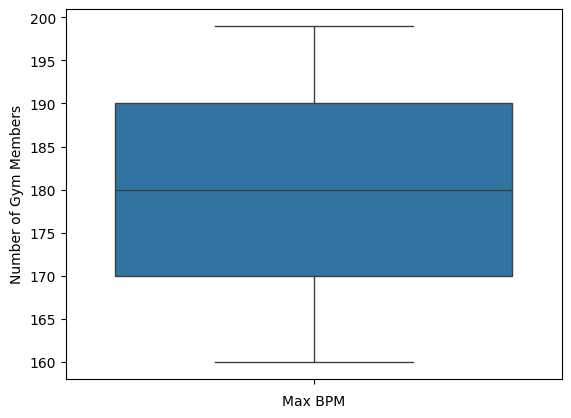

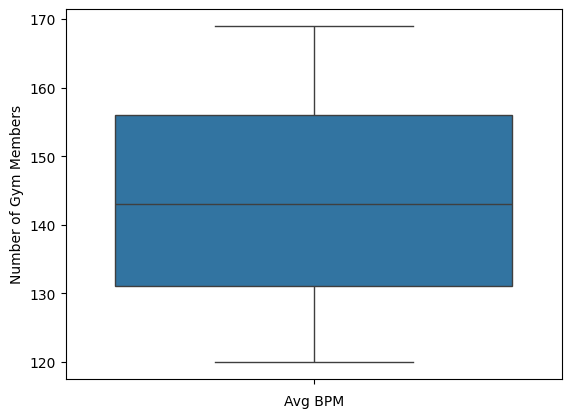

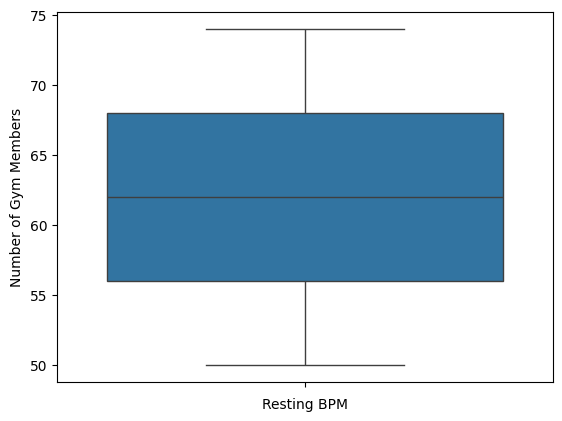

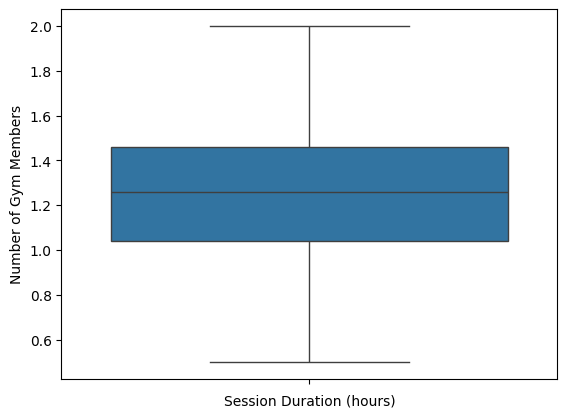

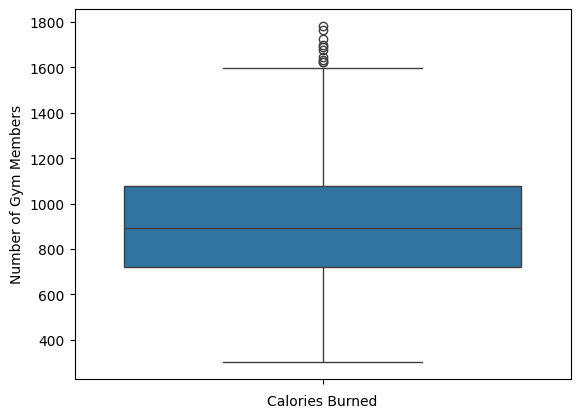

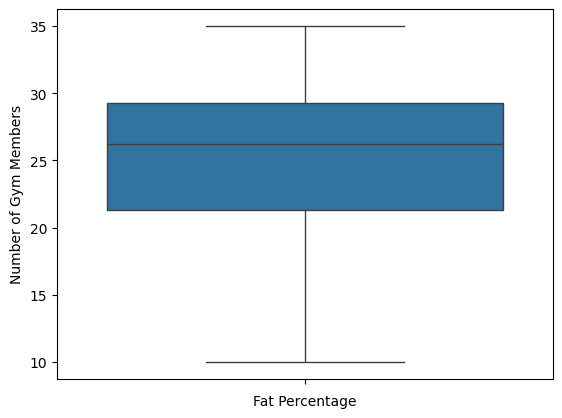

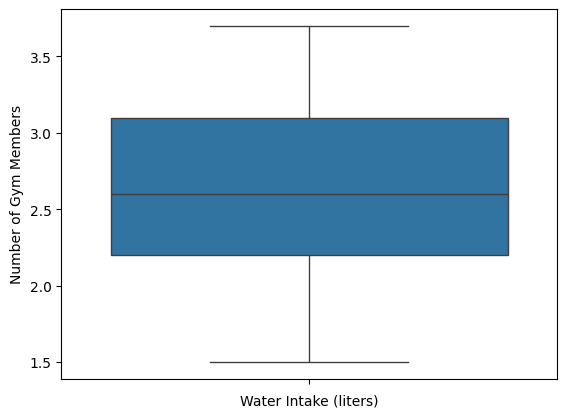

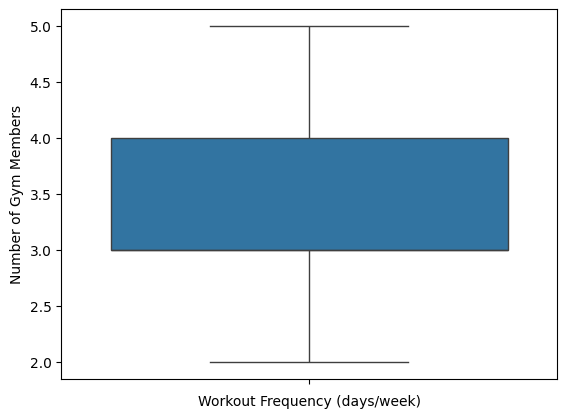

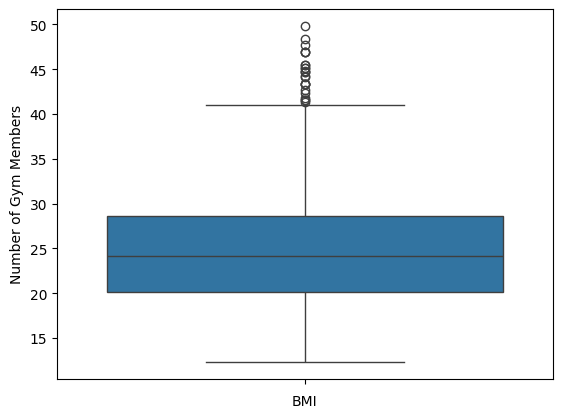

In [100]:
# Checking for outliers in Dataset Which we can see in Weight, Calories_Burned, and BMI
for column in numeric_df:
  sns.boxplot(data=df[column])
  plt.xlabel(column.replace("_", " "))
  plt.ylabel("Number of Gym Members")
  plt.show()

In [114]:
df['Workout_Type'].value_counts()

,count
Workout_Type,
Strength,258
Cardio,255
Yoga,239
HIIT,221


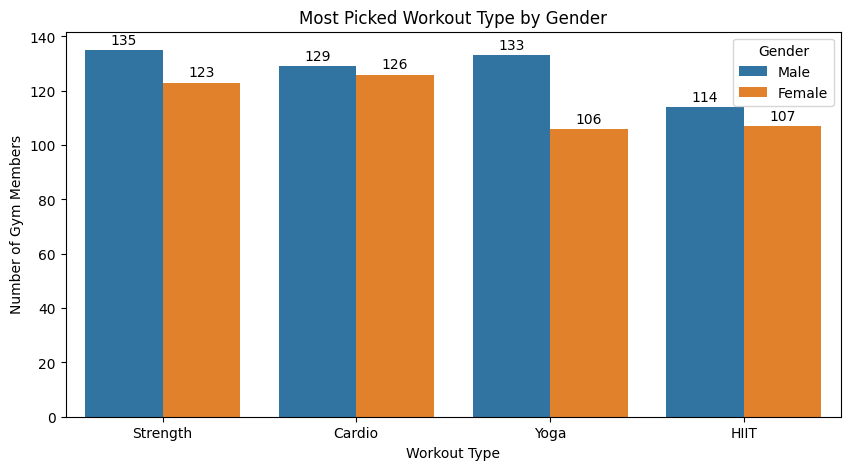

In [17]:
plt.figure(figsize=(10, 5))
ax = sns.countplot(data=df, x='Workout_Type', hue='Gender', order=df["Workout_Type"].value_counts().index)

for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=10, padding=2)

plt.xlabel("Workout Type")
plt.ylabel("Number of Gym Members")
plt.title("Most Picked Workout Type by Gender")
plt.show()

<ipython-input-106-fd8ebfc7ae3c>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=sorted_df.index, y=sorted_df.values, palette ={


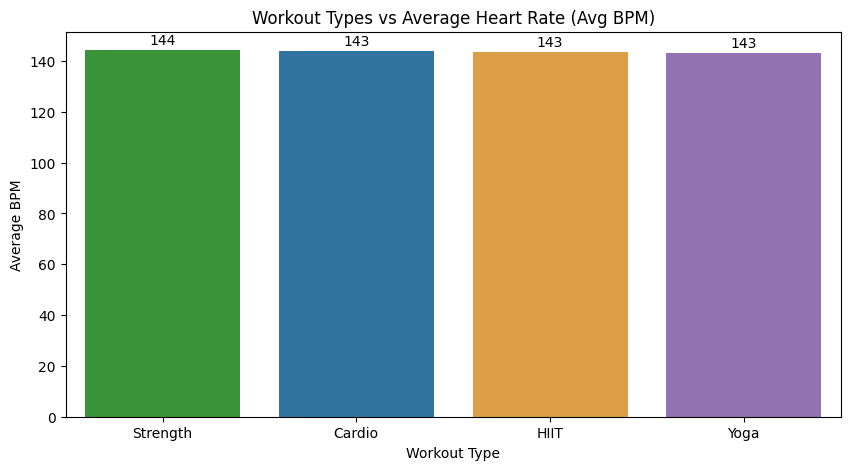

In [106]:
sorted_df = df.groupby('Workout_Type')['Avg_BPM'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 5))
ax = sns.barplot(x=sorted_df.index, y=sorted_df.values, palette ={
    'Cardio': '#1f77b4',  # Blue
    'Strength': '#2ca02c',  # Green
    'Yoga': '#9467bd',  # Purple
    'HIIT': '#f5a32f'  # Yellow Orange
})

for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=10, padding=2)

plt.title("Workout Types vs Average Heart Rate (Avg BPM)")
plt.xlabel("Workout Type")
plt.ylabel("Average BPM")
plt.show()


<ipython-input-110-c49a1c2825db>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=avg_calories_burned.index, y=avg_calories_burned.values, palette ={


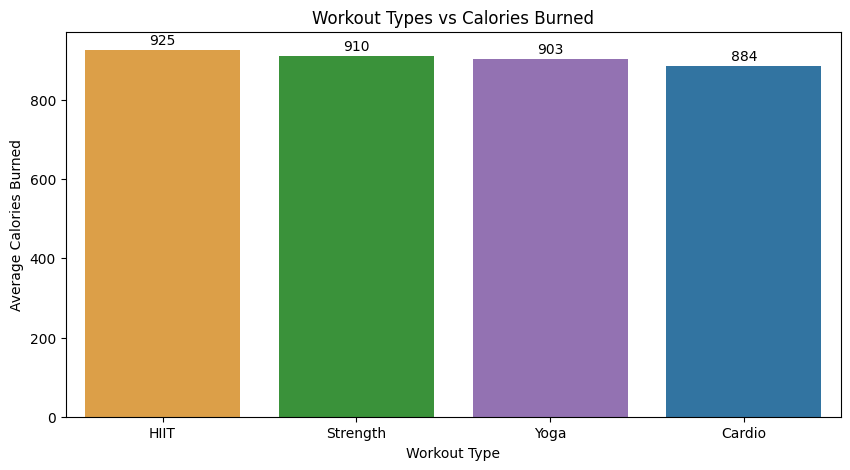

In [110]:
avg_calories_burned = df.groupby('Workout_Type')['Calories_Burned'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 5))
ax = sns.barplot(x=avg_calories_burned.index, y=avg_calories_burned.values, palette ={
    'Cardio': '#1f77b4',  # Blue
    'Strength': '#2ca02c',  # Green
    'Yoga': '#9467bd',  # Purple
    'HIIT': '#f5a32f'  # Yellow Orange
})

for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=10, padding=2)

plt.title("Workout Types vs Calories Burned")
plt.xlabel("Workout Type")
plt.ylabel("Average Calories Burned")
plt.show()


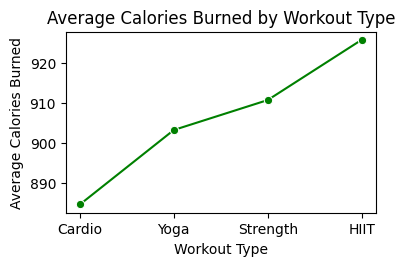

In [118]:
avg_calories_burned = df.groupby('Workout_Type')['Calories_Burned'].mean().sort_values()

plt.figure(figsize=(4, 8))
plt.subplot(3, 1, 2)
sns.lineplot(x=avg_calories_burned.index, y=avg_calories_burned.values, marker='o', color='green')

plt.title('Average Calories Burned by Workout Type')
plt.xlabel('Workout Type')
plt.ylabel('Average Calories Burned')
plt.show()

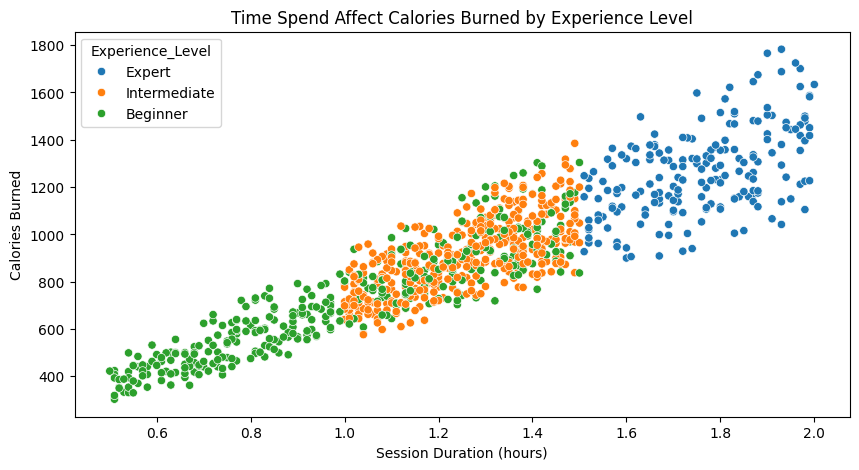

In [92]:
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x='Session_Duration (hours)', y='Calories_Burned', hue='Experience_Level')
plt.xlabel("Session Duration (hours)")
plt.ylabel("Calories Burned")
plt.title("Time Spend Affect Calories Burned by Experience Level")
plt.show()

# 3. Data Prediction

## Data Transformation/Encoding

In [19]:
df['Gender'] = df['Gender'].map({'Male':0, 'Female':1})

In [20]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False)
encoded_array = encoder.fit_transform(df[['Workout_Type']])

df_encoded = pd.DataFrame(encoded_array, columns=encoder.get_feature_names_out(['Workout_Type']))
df_final = df.drop(columns='Workout_Type').join(df_encoded)

df_final

,Age,Gender,Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI,Workout_Type_Cardio,Workout_Type_HIIT,Workout_Type_Strength,Workout_Type_Yoga
0,56,0,180,157,60,1.69,1313.0,12.6,3.5,4,3,30.20,0.0,0.0,0.0,1.0
1,46,1,179,151,66,1.30,883.0,33.9,2.1,4,2,32.00,0.0,1.0,0.0,0.0
2,32,1,167,122,54,1.11,677.0,33.4,2.3,4,2,24.71,1.0,0.0,0.0,0.0
3,25,0,190,164,56,0.59,532.0,28.8,2.1,3,1,18.41,0.0,0.0,1.0,0.0
4,38,0,188,158,68,0.64,556.0,29.2,2.8,3,1,14.39,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
968,24,0,187,158,67,1.57,1364.0,10.0,3.5,4,3,28.77,0.0,0.0,1.0,0.0
969,25,0,184,166,56,1.38,1260.0,25.0,3.0,2,1,25.69,0.0,0.0,1.0,0.0
970,59,1,194,120,53,1.72,929.0,18.8,2.7,5,3,19.50,1.0,0.0,0.0,0.0
971,32,0,198,146,62,1.10,883.0,28.2,2.1,3,2,37.74,0.0,1.0,0.0,0.0


## Predicting Calories_Burned(Regression)

In [21]:
X = df_final.drop(columns=['Calories_Burned'])
y = df_final[['Calories_Burned']].values.ravel()

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

from sklearn.metrics import r2_score, mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error

models = [
  ('Logistic Regression', LinearRegression()),
  ('Decision Tree', XGBRegressor(random_state=42)),
  ('Random Forest', RandomForestRegressor(random_state=42))
]

for name, model in models:
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)

  print(f"Model: {name}")
  print("R2 Score:", r2_score(y_test, y_pred))
  print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

  mape = mean_absolute_percentage_error(y_test, y_pred) * 100
  print("MAPE:", mape, "%")
  print()

Model: Logistic Regression
R2 Score: 0.9801300199254651
RMSE: 40.71429229649878
MAPE: 3.6843108077029743 %

Model: Decision Tree
R2 Score: 0.9821612081654456
RMSE: 38.57721693179305
MAPE: 3.064487639562989 %

Model: Random Forest
R2 Score: 0.9738112513308433
RMSE: 46.74181242988732
MAPE: 3.9531041101686206 %



## Predicting Experience_Level(Classification)

In [24]:
X = df_final.drop(columns=['Experience_Level'])
# because Experience Level Value is 1, 2, 3 we need to fix it to start from 0
y = df_final['Experience_Level'] - 1

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, classification_report

models = [
    ('Random Forest', RandomForestClassifier(random_state=42)),
    ('XGBoost', XGBClassifier(n_estimators=100, max_depth=4, learning_rate=0.1, random_state=42)),
]

for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(f"Model: {name}")
    print("Akurasi:", accuracy_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print()

Model: Random Forest
Akurasi: 0.8923076923076924
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.82      0.86        78
           1       0.83      0.91      0.87        75
           2       1.00      1.00      1.00        42

    accuracy                           0.89       195
   macro avg       0.91      0.91      0.91       195
weighted avg       0.89      0.89      0.89       195


Model: XGBoost
Akurasi: 0.8871794871794871
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.82      0.85        78
           1       0.83      0.89      0.86        75
           2       1.00      1.00      1.00        42

    accuracy                           0.89       195
   macro avg       0.91      0.90      0.90       195
weighted avg       0.89      0.89      0.89       195


